In [1]:
import pandas as pd
import numpy as np
import pandas_profiling 
import matplotlib.pyplot as plt
import alphalens
import pickle 

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


%matplotlib inline

/usr/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
data_sectors = pd.read_csv('./data/sectors.csv').dropna()

In [3]:
sectors = data_sectors.INDUSTRY_SECTOR.unique()
for k,v in data_sectors.groupby('INDUSTRY_SECTOR').groups.items():
    print(k,len(v))

Basic Materials 27
Communications 47
Consumer, Cyclical 92
Consumer, Non-cyclical 142
Energy 55
Financial 112
Industrial 84
Technology 66
Utilities 34


In [4]:
ticker_sector = {sector : data_sectors[data_sectors.INDUSTRY_SECTOR == sector].TICKER.values for sector in sectors}
tickers = ticker_sector.values()

In [5]:
al_tickers_dict = {}
al_sectors_dict = {}
for i,s in enumerate(sectors):
    al_sectors_dict[i] = s
    for t in ticker_sector[s]:
        al_tickers_dict[t] = i

In [6]:
#pandas_profiling.ProfileReport(data_price)

In [7]:
with open('./data/market.pkl','rb') as f:
    data_price_s = pickle.load(f).asfreq('C')

data_price_s.dropna(inplace=True)
data_price = data_price_s.loc[:,(slice(None),slice(None),'close')]#.dropna()
data_price.columns = data_price.columns.droplevel(level=2).droplevel(level=0)

# data_price_s = data_price_s.Financial
# data_price = data_price_s.loc[:,(slice(None),'close')]#.dropna()
# data_price.columns = data_price.columns.droplevel(level=1)

In [13]:
days_ahead = 5
#pred_factor = data_price.pct_change(days_ahead).shift(-days_ahead)#[days_ahead:]

pred_factor = data_price_s.loc[:,(slice(None),slice(None),'rank')]#.rank(axis=1,pct=True,ascending=True)
pred_factor.columns = pred_factor.columns.droplevel(level=2).droplevel(level=0)

# pred_factor = data_price_s.loc[:,(slice(None),'pred')]
# pred_factor.columns = pred_factor.columns.droplevel(level=1)

pred_factor = (pred_factor).stack()

In [14]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(pred_factor, 
                                                                   data_price, 
                                                                   quantiles=5,
                                                                   
                                                                   periods=(1,21),
                                                                   bins=None,
                                                                   groupby=al_tickers_dict,
                                                                   groupby_labels=al_sectors_dict)

Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [15]:
q_f = alphalens.utils.quantize_factor(factor_data)
ret = alphalens.performance.factor_returns(factor_data)
alphalens.performance.factor_alpha_beta(factor_data)

,1D,21D
Ann. alpha,-0.006910,-0.003463
beta,-0.026687,-0.052937


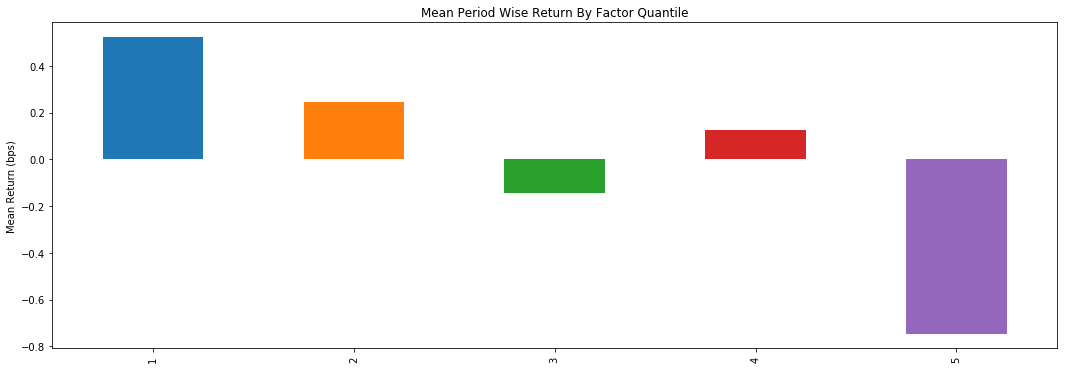

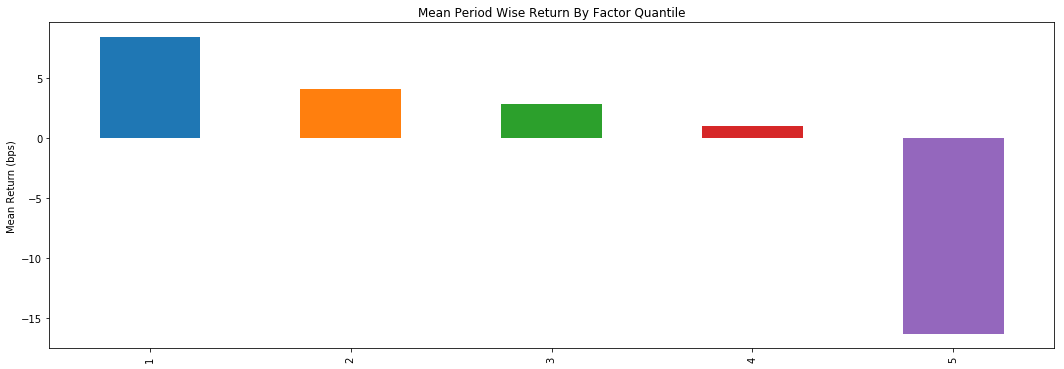

In [16]:
mret,err = alphalens.performance.mean_return_by_quantile(factor_data)
[alphalens.plotting.plot_quantile_returns_bar(mret[r]) for r in mret.columns]

/usr/lib/python3.7/site-packages/pandas/core/indexes/datetimes.py:962: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


KeyboardInterrupt: 

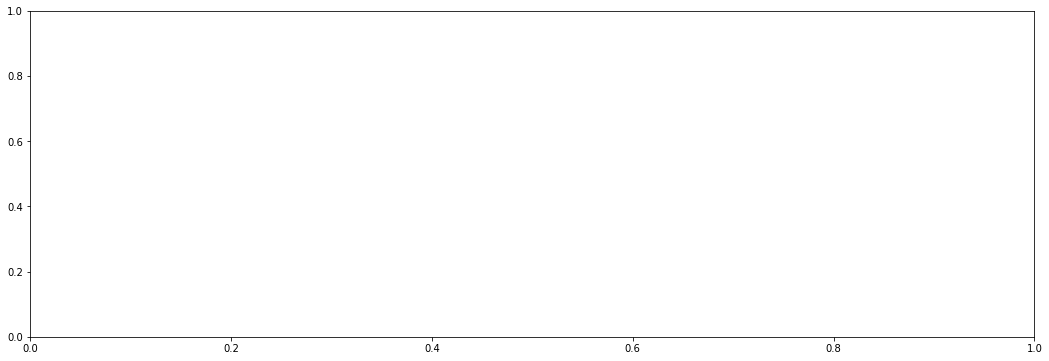

In [12]:
mdret,err = alphalens.performance.mean_return_by_quantile(factor_data,by_date=True)
[alphalens.plotting.plot_cumulative_returns_by_quantile(mdret[r],r) for r in mdret]

In [ ]:
[alphalens.plotting.plot_cumulative_returns(ret[r],r) for r in ret.columns];

In [ ]:
alphalens.plotting.plot_quantile_statistics_table(factor_data)

In [ ]:
#alphalens.tears.create_full_tear_sheet(factor_data, by_group=True)
alphalens.tears.create_returns_tear_sheet(factor_data)

In [ ]:
perfect_factor = factor_data.unstack().factor_quantile
#perfect_factor.to_csv('./PERFECT_FACTOR.csv')

In [ ]:
#pandas_profiling.ProfileReport(perfect_factor)

In [ ]:
s = data_10by_sector.Technology
s = s.loc[:,(slice(None),'close')]
s.columns = s.columns.droplevel(level=1)

In [ ]:
d = pd.DataFrame([np.arange(1000)**2,10*np.arange(1000)**1.5]).T

In [ ]:
ts=0,21,21*3
rs = [d.shift(t) for t in ts]
ms = ((rs[1]-rs[2])/rs[2] - (rs[0]-rs[1])/rs[1])/np.nanstd(rs[0].diff(),axis=0)

In [ ]:
INPUT_DIM = 50
N = 100
X_1 = 2 * np.random.uniform(size = (N, INPUT_DIM))
X_2 = np.random.uniform(size = (N, INPUT_DIM))
y = np.ones((X_1.shape[0], 1))


In [ ]:
X_1[0]

In [ ]:
data_price.session

In [ ]:
np.random.permutation(5)